In [239]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np



In [240]:
train = pd.read_csv('/Users/adityapatil/ML Project/House_price_prediction/train.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [241]:
train.shape

(1460, 81)

In [242]:
test = pd.read_csv('/Users/adityapatil/ML Project/House_price_prediction/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [243]:
test.shape

(1459, 80)

In [244]:
columns_to_drop = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'] 

train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)
print('train shape:',train.shape)
print('test shape:',test.shape)

train shape: (1460, 75)
test shape: (1459, 74)


In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [246]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [247]:
columns_float = ['LotFrontage','MasVnrArea','GarageYrBlt']



Replacing null(float,int) by mean

In [248]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
train[columns_float] = imputer_mean.fit_transform(train[columns_float])
test[columns_float] = imputer_mean.transform(test[columns_float])

Replacing null(obj) by mode

In [249]:
columns_object = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','Electrical']
from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')

train[columns_object] = imputer_mode.fit_transform(train[columns_object])

test[columns_object] = imputer_mode.transform(test[columns_object])


In [250]:
import pandas as pd

train_df = pd.DataFrame(train)




In [251]:
test_df = pd.DataFrame(test)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [252]:
test_columns_float = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
                     'GarageCars','GarageArea']
test_columns_object = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']





replacing null value in test data by mode


In [253]:


test[test_columns_object] = imputer_mode.fit_transform(test[test_columns_object])



replacing null value in test data by mean

In [254]:
test[test_columns_float] = imputer_mean.fit_transform(test[test_columns_float])

In [255]:
test_df = pd.DataFrame(test)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [256]:
# pip install mlxtend

In [257]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [258]:
# correlation = train.corrwith(train['SalePrice'])
# print(correlation)

In [259]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [260]:
from sklearn.preprocessing import OrdinalEncoder

oe_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
              'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'KitchenAbvGr', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
              'SaleType', 'SaleCondition','KitchenQual']


oe = OrdinalEncoder()

train[oe_columns] = oe.fit_transform(train[oe_columns])

test[oe_columns] = oe.transform(test[oe_columns])


In [261]:
# from sklearn.ensemble import RandomForestRegressor

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# model = RandomForestRegressor(n_estimators=101, random_state=42)



# sfs.fit(x_train, y_train)

# print("Selected Features:", sfs.k_feature_names_)

# # Evaluate the performance of the selected features on the testing set
# scorer = make_scorer(r2_score)

# cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=5, scoring=scorer)

# print("Cross-validation scores:", cv_scores)
# print("Mean R2 score:", cv_scores.mean())

In [262]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706,5.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1.0,2.0,8,6.0,0,1.0,2003.0,1.0,2,548,4.0,4.0,2.0,0,61,0,0,0,0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978,5.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1.0,3.0,6,6.0,1,1.0,1976.0,1.0,2,460,4.0,4.0,2.0,298,0,0,0,0,0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486,5.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1.0,2.0,6,6.0,1,1.0,2001.0,1.0,2,608,4.0,4.0,2.0,0,42,0,0,0,0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216,5.0,0,540,756,1.0,2.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1.0,2.0,7,6.0,1,5.0,1998.0,2.0,3,642,4.0,4.0,2.0,0,35,272,0,0,0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655,5.0,0,490,1145,1.0,0.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1.0,2.0,9,6.0,1,1.0,2000.0,1.0,3,836,4.0,4.0,2.0,192,84,0,0,0,0,0,12,2008,8.0,4.0,250000


In [263]:
# correlations = train.corr()['SalePrice'].abs()
# correlations = train.corr()['SalePrice'].abs()

# # Sort features based on their correlation with the target variable (in descending order)
# sorted_correlations = correlations.sort_values(ascending=False)

# # Select features with correlation coefficient above a certain threshold (e.g., 0.5)
# threshold = 0.5
# selected_features = sorted_correlations[sorted_correlations > threshold]

# # Print selected features
# print("Selected features based on Pearson correlation coefficient:")
# print(selected_features.index.tolist())


In [264]:
# # Assuming train is your DataFrame containing features and target variable
# selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 
#                      'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 
#                      'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd','SalePrice']

# # Extract selected features from the DataFrame
# train_2 = train[selected_features]

# # Print selected features
# print("Selected features:")
# print(train_2.columns.tolist())

In [265]:
# pd.set_option('display.max_columns', None)
# train.head()

In [282]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming train is your DataFrame containing the data
# Create a PCA instance
pca = PCA(n_components=4)  # You can specify the number of components you want to keep

# Fit PCA to the data
pca.fit(train)

# Transform the data into principal components
principal_components = pca.transform(train)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Concatenate the principal components with 'SalePrice'
final_df = pd.concat([principal_df, train[['SalePrice']]], axis=1)

# Print the final DataFrame with principal components and 'SalePrice'
print(final_df)


               PC1          PC2          PC3         PC4  SalePrice
0     27493.525978 -2993.925773  -296.467253  734.036144     208500
1       547.725544  -929.990546   742.693791  242.241583     181500
2     42579.462206  -701.927161  -477.041804  418.130023     223500
3    -40929.737502   409.250711  -574.725485  102.295206     140000
4     69169.765953  1418.332009  -521.344049  376.760683     250000
...            ...          ...          ...         ...        ...
1455  -6005.622936 -2405.178633  -644.786040 -301.328966     175000
1456  29158.155935  1688.777477   607.855174 -355.249520     210000
1457  85483.148917 -4350.751036 -1000.858294  343.030305     266500
1458 -38804.947400   506.470021   275.630599  161.131192     142125
1459 -33421.585132   550.695310   693.927289  253.009001     147500

[1460 rows x 5 columns]


In [283]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [284]:
y.shape

(1460,)

In [285]:
# from scipy.stats import pearsonr

# # Assuming x and y are Pandas DataFrame objects
# x = x.values.flatten()
# y = y.values.flatten()

# # Calculate Pearson correlation coefficient
# correlation_coefficient, p_value = pearsonr(x, y)

# print("Pearson correlation coefficient:", correlation_coefficient)
# print("P-value:", p_value)


In [286]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [287]:
# from sklearn.ensemble import RandomForestRegressor

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# model = RandomForestRegressor(n_estimators=101, random_state=42)



# sfs.fit(x_train, y_train)

# print("Selected Features:", sfs.k_feature_names_)

# # Evaluate the performance of the selected features on the testing set
# scorer = make_scorer(r2_score)

# cv_scores = cross_val_score(model, x_train[selected_features], y_train, cv=5, scoring=scorer)

# print("Cross-validation scores:", cv_scores)
# print("Mean R2 score:", cv_scores.mean())

In [288]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=101, random_state=42)

# model.fit(x_train, y_train)



In [289]:
# !pip install xgboost

In [290]:
import xgboost as xgb

xg = xgb.XGBRegressor()

xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [291]:
y_pred_xg = xg.predict(x_test)

In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_xg)
mae = mean_absolute_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('MAE:',mae)
print('r2:',r2)
print('RMSE:',rmse)

MSE: 719791193.3587053
MAE: 17046.498180650684
r2: 0.9061589854308597
RMSE: 26828.924565824575


using ANN

In [293]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

In [307]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')


])

ann.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ann.fit(x_train, y_train, batch_size = 25, epochs = 50)

y_pred_ann = ann.predict(x_test)



Epoch 1/50
47/47 [==============================] - 0s 358us/step - loss: 38234443776.0000 - mean_absolute_error: 179826.8906
Epoch 2/50
47/47 [==============================] - 0s 331us/step - loss: 37484646400.0000 - mean_absolute_error: 177891.3281
Epoch 3/50
47/47 [==============================] - 0s 303us/step - loss: 36582273024.0000 - mean_absolute_error: 175483.2188
Epoch 4/50
47/47 [==============================] - 0s 299us/step - loss: 35551285248.0000 - mean_absolute_error: 172692.5000
Epoch 5/50
47/47 [==============================] - 0s 302us/step - loss: 34380460032.0000 - mean_absolute_error: 169517.9375
Epoch 6/50
47/47 [==============================] - 0s 298us/step - loss: 33092990976.0000 - mean_absolute_error: 165886.2344
Epoch 7/50
47/47 [==============================] - 0s 289us/step - loss: 31699353600.0000 - mean_absolute_error: 161834.2656
Epoch 8/50
47/47 [==============================] - 0s 303us/step - loss: 30206576640.0000 - mean_absolute_error: 1574

In [308]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_ann)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred_ann)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ann)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


R^2 Score: 0.3355116823515826
Mean Absolute Error (MAE): 46860.13928724315
Mean Squared Error (MSE): 5096842157.228339
Root Mean Squared Error (RMSE): 71392.17154022098


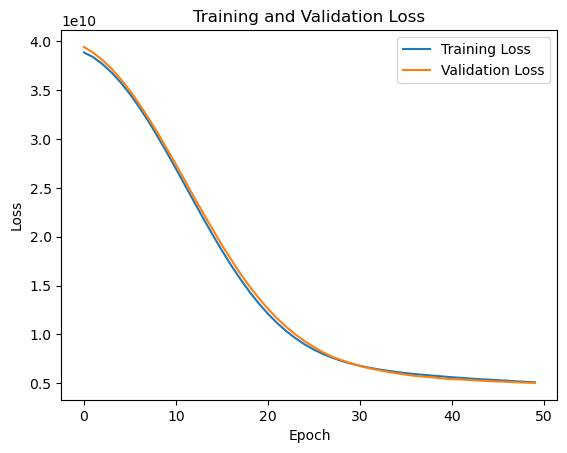

In [306]:
# Define the model architecture

ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=3, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')


])



# Compile the model
ann.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Train the model and record training history
history = ann.fit(x_train, y_train, batch_size=25, epochs=50, validation_data=(x_test, y_test), verbose=0)

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

# # Assuming x_train, y_train, x_val, and y_val are your actual training and validation data
# # Replace these with your actual data


# # Define the model architecture
# ann = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(units=10, activation='relu'),
#     tf.keras.layers.Dense(units=10, activation='relu'),
#     tf.keras.layers.Dense(units=10, activation='relu'),
#     tf.keras.layers.Dense(units=1, activation='linear')
# ])

# # Compile the model
# ann.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# # Train the model and record training history
# history = ann.fit(x_train, y_train, batch_size=50, epochs=120, validation_data=(x_test, y_test), verbose=0)

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Training and Validation Loss')
# plt.show()

# # Plot training and validation MAE
# plt.plot(history.history['mean_absolute_error'], label='Training MAE')
# plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.legend()
# plt.title('Training and Validation MAE')
# plt.show()


In [ ]:
# import pandas as pd


# predictions_df = test[['Id']].copy()  
# predictions_df['SalePrice'] = y_pred_xg

# predictions_df.to_csv('predictions.csv', index=False)



In [ ]:
# predictions_df.head()

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# import pandas as pd


# model = ExtraTreesRegressor()

# model.fit(x, y)

# feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# top_10_features = feat_importances.nlargest(30)
# print(top_10_features)
